+--------------------+---------------------+------------+
|       Provider Name|Total Confirmed Cases|Total Deaths|
+--------------------+---------------------+------------+
|MILLER'S MERRY MANOR|                40373|       25389|
|BRIGHTON REHABILI...|                29645|       12361|
|CEDARBROOK SENIOR...|                28403|       21440|
|SPRING CREEK REHA...|                28139|       20269|
|        CHAPEL MANOR|                25776|       11740|
+--------------------+---------------------+------------+

+--------------------+---------------------+------------+
|       Provider Name|Total Confirmed Cases|Total Deaths|
+--------------------+---------------------+------------+
|KEARNY MESA CONVA...|                    0|           0|
|MENIFEE LAKES POS...|                    0|           0|
|      THE ROYAL HOME|                    0|           0|
|        GARDENS, THE|                    0|           0|
|COMPLETE CARE AT ...|                    0|           0|
+------------

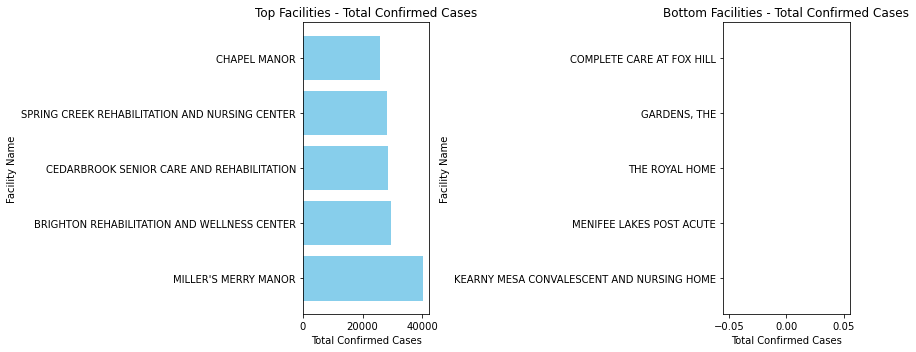

In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_date, sum
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Spark session
spark = SparkSession.builder.appName("NursingHomeAnalysis").getOrCreate()

# Load the dataset
data_path = "updated_file.csv"
df = spark.read.option("header", "true").csv(data_path)

# Select relevant columns for analysis
selected_columns = ["Provider Name", "Residents Total Confirmed COVID-19", "Residents Total All Deaths"]
selected_df = df.select(selected_columns)

# Convert columns to numeric type
selected_df = selected_df.withColumn("Residents Total Confirmed COVID-19", col("Residents Total Confirmed COVID-19").cast("int"))
selected_df = selected_df.withColumn("Residents Total All Deaths", col("Residents Total All Deaths").cast("int"))

# Calculate the total confirmed COVID-19 cases and deaths for each facility
facility_totals = selected_df.groupBy("Provider Name").agg(
    {"Residents Total Confirmed COVID-19": "sum", "Residents Total All Deaths": "sum"}
).withColumnRenamed("sum(Residents Total Confirmed COVID-19)", "Total Confirmed Cases")\
 .withColumnRenamed("sum(Residents Total All Deaths)", "Total Deaths")

# Display facilities with the highest and lowest numbers of confirmed cases and deaths
top_facilities = facility_totals.orderBy(col("Total Confirmed Cases").desc()).limit(5)
bottom_facilities = facility_totals.orderBy(col("Total Confirmed Cases")).limit(5)

top_facilities.show()
bottom_facilities.show()

# Convert PySpark DataFrame to Pandas DataFrame for visualization
top_pd = top_facilities.toPandas()
bottom_pd = bottom_facilities.toPandas()

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Top Facilities
ax1.barh(top_pd["Provider Name"], top_pd["Total Confirmed Cases"], color='skyblue')
ax1.set_title('Top Facilities - Total Confirmed Cases')
ax1.set_xlabel('Total Confirmed Cases')
ax1.set_ylabel('Facility Name')

# Bottom Facilities
ax2.barh(bottom_pd["Provider Name"], bottom_pd["Total Confirmed Cases"], color='salmon')
ax2.set_title('Bottom Facilities - Total Confirmed Cases')
ax2.set_xlabel('Total Confirmed Cases')
ax2.set_ylabel('Facility Name')

plt.tight_layout()
plt.show()


Analysis 1: Trend Analysis - Weekly Confirmed Cases and Deaths
+-----------+----------------------------+-------------------+
|Week Ending|Total Weekly Confirmed Cases|Total Weekly Deaths|
+-----------+----------------------------+-------------------+
| 2022-07-31|                       14446|               5112|
| 2022-12-25|                       17218|               5962|
| 2022-04-10|                        1659|               5052|
| 2022-05-01|                        4741|               5104|
| 2022-11-20|                       11694|               5287|
| 2022-01-09|                       38464|               6322|
| 2022-12-11|                       19933|               5882|
| 2022-06-05|                        8895|               5043|
| 2022-08-07|                       14705|               4919|
| 2022-06-19|                        8746|               4969|
| 2022-07-24|                       15333|               5123|
| 2022-01-23|                       49749|             

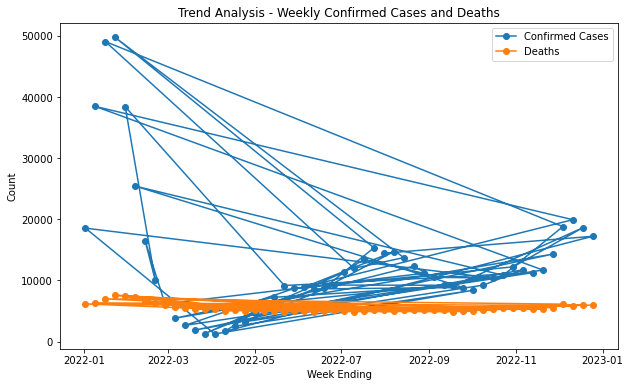

Analysis 2: Number of Nursing Homes by State
+--------------+-----+
|Provider State|count|
+--------------+-----+
|            TX|62598|
|            CA|61129|
|            OH|49378|
|            IL|36392|
|            FL|36297|
|            PA|35382|
|            NY|31682|
|            IN|27171|
|            MO|26735|
|            MI|22368|
|            IA|22198|
|            NC|22062|
|            GA|18683|
|            MA|18679|
|            MN|18543|
|            NJ|18207|
|            WI|17740|
|            KS|16401|
|            TN|16215|
|            OK|15381|
+--------------+-----+
only showing top 20 rows



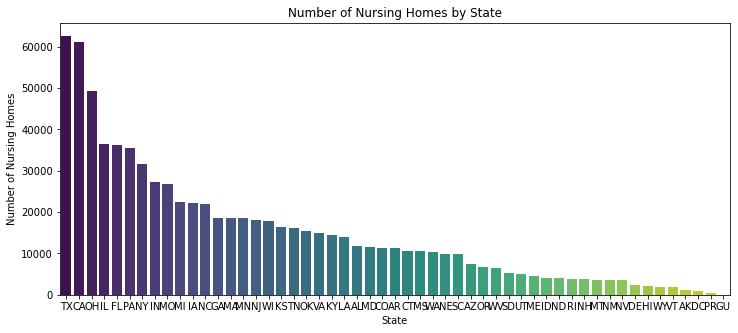

Analysis 3: Facility Performance - Total Confirmed Cases and Deaths
+--------------------+---------------------+------------+
|       Provider Name|Total Confirmed Cases|Total Deaths|
+--------------------+---------------------+------------+
|WIREGRASS REHABIL...|               3803.0|      3525.0|
|ARCHSTONE CARE CE...|               2903.0|      3323.0|
|CRESTPARK STUTTGA...|               2912.0|      2495.0|
|CARE MANOR NURSIN...|               3348.0|      3936.0|
|WHITE RIVER HEALT...|               3321.0|      1648.0|
|CENTRAL VALLEY PO...|               3245.0|      1450.0|
|ARTESIA CHRISTIAN...|                642.0|      2351.0|
|THE AVENUES TRANS...|               8082.0|      3951.0|
|WOODLAND CARE CENTER|              11529.0|      2778.0|
|MANTEY HEIGHTS RE...|               2205.0|      1495.0|
|HEALTHCARE RESORT...|                  0.0|         0.0|
|VERNON  REHABILIT...|               4804.0|      2345.0|
|           BEECHWOOD|               1541.0|      2400.0|
|EAS

In [9]:
# Analysis 1: Trend Analysis
trend_df = df.select("Week Ending", "Residents Weekly Confirmed COVID-19", "Residents Weekly All Deaths")
trend_df = trend_df.withColumn("Week Ending", to_date("Week Ending", "MM/dd/yy"))
trend_df = trend_df.withColumn("Residents Weekly Confirmed COVID-19", col("Residents Weekly Confirmed COVID-19").cast("int"))
trend_df = trend_df.withColumn("Residents Weekly All Deaths", col("Residents Weekly All Deaths").cast("int"))

weekly_sum_df = trend_df.groupBy("Week Ending").agg(
    {"Residents Weekly Confirmed COVID-19": "sum", "Residents Weekly All Deaths": "sum"}
).withColumnRenamed("sum(Residents Weekly Confirmed COVID-19)", "Total Weekly Confirmed Cases")\
 .withColumnRenamed("sum(Residents Weekly All Deaths)", "Total Weekly Deaths")

# Display table
print("Analysis 1: Trend Analysis - Weekly Confirmed Cases and Deaths")
weekly_sum_df.show()

# Plotting
weekly_sum_pd = weekly_sum_df.toPandas()
plt.figure(figsize=(10, 6))
plt.plot(weekly_sum_pd["Week Ending"], weekly_sum_pd["Total Weekly Confirmed Cases"], label='Confirmed Cases', marker='o')
plt.plot(weekly_sum_pd["Week Ending"], weekly_sum_pd["Total Weekly Deaths"], label='Deaths', marker='o')
plt.title('Trend Analysis - Weekly Confirmed Cases and Deaths')
plt.xlabel('Week Ending')
plt.ylabel('Count')
plt.legend()
plt.show()

# Analysis 2: Geographical Analysis
state_count_df = df.groupBy("Provider State").count().orderBy("count", ascending=False)

# Display table
print("Analysis 2: Number of Nursing Homes by State")
state_count_df.show()

# Plotting
state_count_pd = state_count_df.toPandas()
plt.figure(figsize=(12, 5))
sns.barplot(x="Provider State", y="count", data=state_count_pd, palette="viridis")
plt.title('Number of Nursing Homes by State')
plt.xlabel('State')
plt.ylabel('Number of Nursing Homes')
plt.show()

# Analysis 3: Facility Performance
facility_totals = df.groupBy("Provider Name").agg(
    {"Residents Total Confirmed COVID-19": "sum", "Residents Total All Deaths": "sum"}
).withColumnRenamed("sum(Residents Total Confirmed COVID-19)", "Total Confirmed Cases")\
 .withColumnRenamed("sum(Residents Total All Deaths)", "Total Deaths")

# Display table
print("Analysis 3: Facility Performance - Total Confirmed Cases and Deaths")
facility_totals.show()



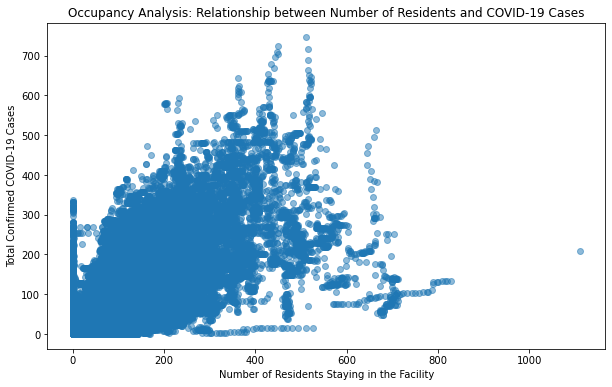

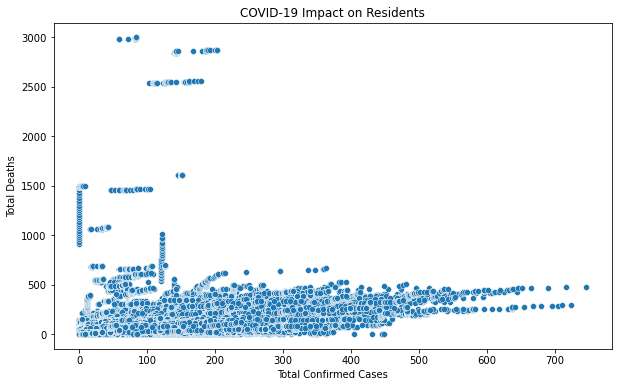

In [10]:
# Occupancy Analysis: Relationship between the number of residents staying in a facility and COVID-19 incidence
occupancy_df = df.select("Number of Residents Staying in this Facility for At Least 1 Day This Week", 
                        "Residents Total Confirmed COVID-19")

# Convert columns to numeric type
occupancy_df = occupancy_df.withColumn("Number of Residents Staying in this Facility for At Least 1 Day This Week", 
                                       col("Number of Residents Staying in this Facility for At Least 1 Day This Week").cast("int"))
occupancy_df = occupancy_df.withColumn("Residents Total Confirmed COVID-19", 
                                       col("Residents Total Confirmed COVID-19").cast("int"))

# Display table
# print("Occupancy Analysis: Relationship between the number of residents and COVID-19 cases")
# occupancy_df.show()

# Plotting
occupancy_pd = occupancy_df.toPandas()
plt.figure(figsize=(10, 6))
plt.scatter(occupancy_pd["Number of Residents Staying in this Facility for At Least 1 Day This Week"], 
            occupancy_pd["Residents Total Confirmed COVID-19"], alpha=0.5)
plt.title('Occupancy Analysis: Relationship between Number of Residents and COVID-19 Cases')
plt.xlabel('Number of Residents Staying in the Facility')
plt.ylabel('Total Confirmed COVID-19 Cases')
plt.show()

# Analysis 4: COVID-19 Impact on Residents
impact_df = df.select("Residents Total Confirmed COVID-19", "Residents Total All Deaths")
impact_df = impact_df.withColumn("Residents Total Confirmed COVID-19", col("Residents Total Confirmed COVID-19").cast("int"))
impact_df = impact_df.withColumn("Residents Total All Deaths", col("Residents Total All Deaths").cast("int"))

# Plotting Analysis 4
impact_pd = impact_df.toPandas()
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Residents Total Confirmed COVID-19", y="Residents Total All Deaths", data=impact_pd)
plt.title('COVID-19 Impact on Residents')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Total Deaths')
plt.show()

Proportion of Vaccinated Residents by Facility Size
+--------------------+----------+----------------------------------+
|       Provider Name|Total Beds|Proportion of Vaccinated Residents|
+--------------------+----------+----------------------------------+
|WIREGRASS REHABIL...|    4992.0|                 0.312900641025641|
|ARCHSTONE CARE CE...|    5616.0|               0.18108974358974358|
|CRESTPARK STUTTGA...|    5200.0|               0.29134615384615387|
|CARE MANOR NURSIN...|    5408.0|               0.13184171597633135|
|WHITE RIVER HEALT...|    3640.0|               0.14203296703296703|
|CENTRAL VALLEY PO...|    5148.0|                0.1486013986013986|
|ARTESIA CHRISTIAN...|    3432.0|                0.2537878787878788|
|THE AVENUES TRANS...|    7280.0|               0.36964285714285716|
|WOODLAND CARE CENTER|    8164.0|               0.21068103870651642|
|MANTEY HEIGHTS RE...|    4576.0|               0.29676573426573427|
|HEALTHCARE RESORT...|       0.0|                  

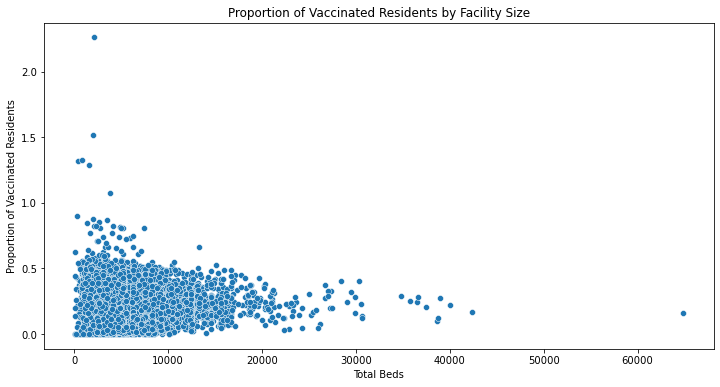

In [11]:
# Ensure uniqueness in Provider Name by aggregating values
aggregated_df = df.groupBy("Provider Name").agg(
    sum("Number of Residents Staying in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines").alias("Total Residents Vaccinated"),
    sum("Number of All Beds").alias("Total Beds")
)

# Calculate the proportion of vaccinated residents by facility size
vaccination_proportion_df = aggregated_df.withColumn('Proportion of Vaccinated Residents', col('Total Residents Vaccinated') / col('Total Beds'))

# Display table
print("Proportion of Vaccinated Residents by Facility Size")
vaccination_proportion_df.select("Provider Name", "Total Beds", "Proportion of Vaccinated Residents").show()

# Plotting
vaccination_proportion_pd = vaccination_proportion_df.toPandas()
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total Beds', y='Proportion of Vaccinated Residents', data=vaccination_proportion_pd)
plt.title('Proportion of Vaccinated Residents by Facility Size')
plt.xlabel('Total Beds')
plt.ylabel('Proportion of Vaccinated Residents')
plt.show()
